# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [90]:
# Your code here

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

df = pd.read_csv('BostonHousing.csv')

The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [34]:
# Your code here

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Record your observations here 

# All variables are numerical.  Of these, chas and rad are discrete.  The rest are continuous.  


### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

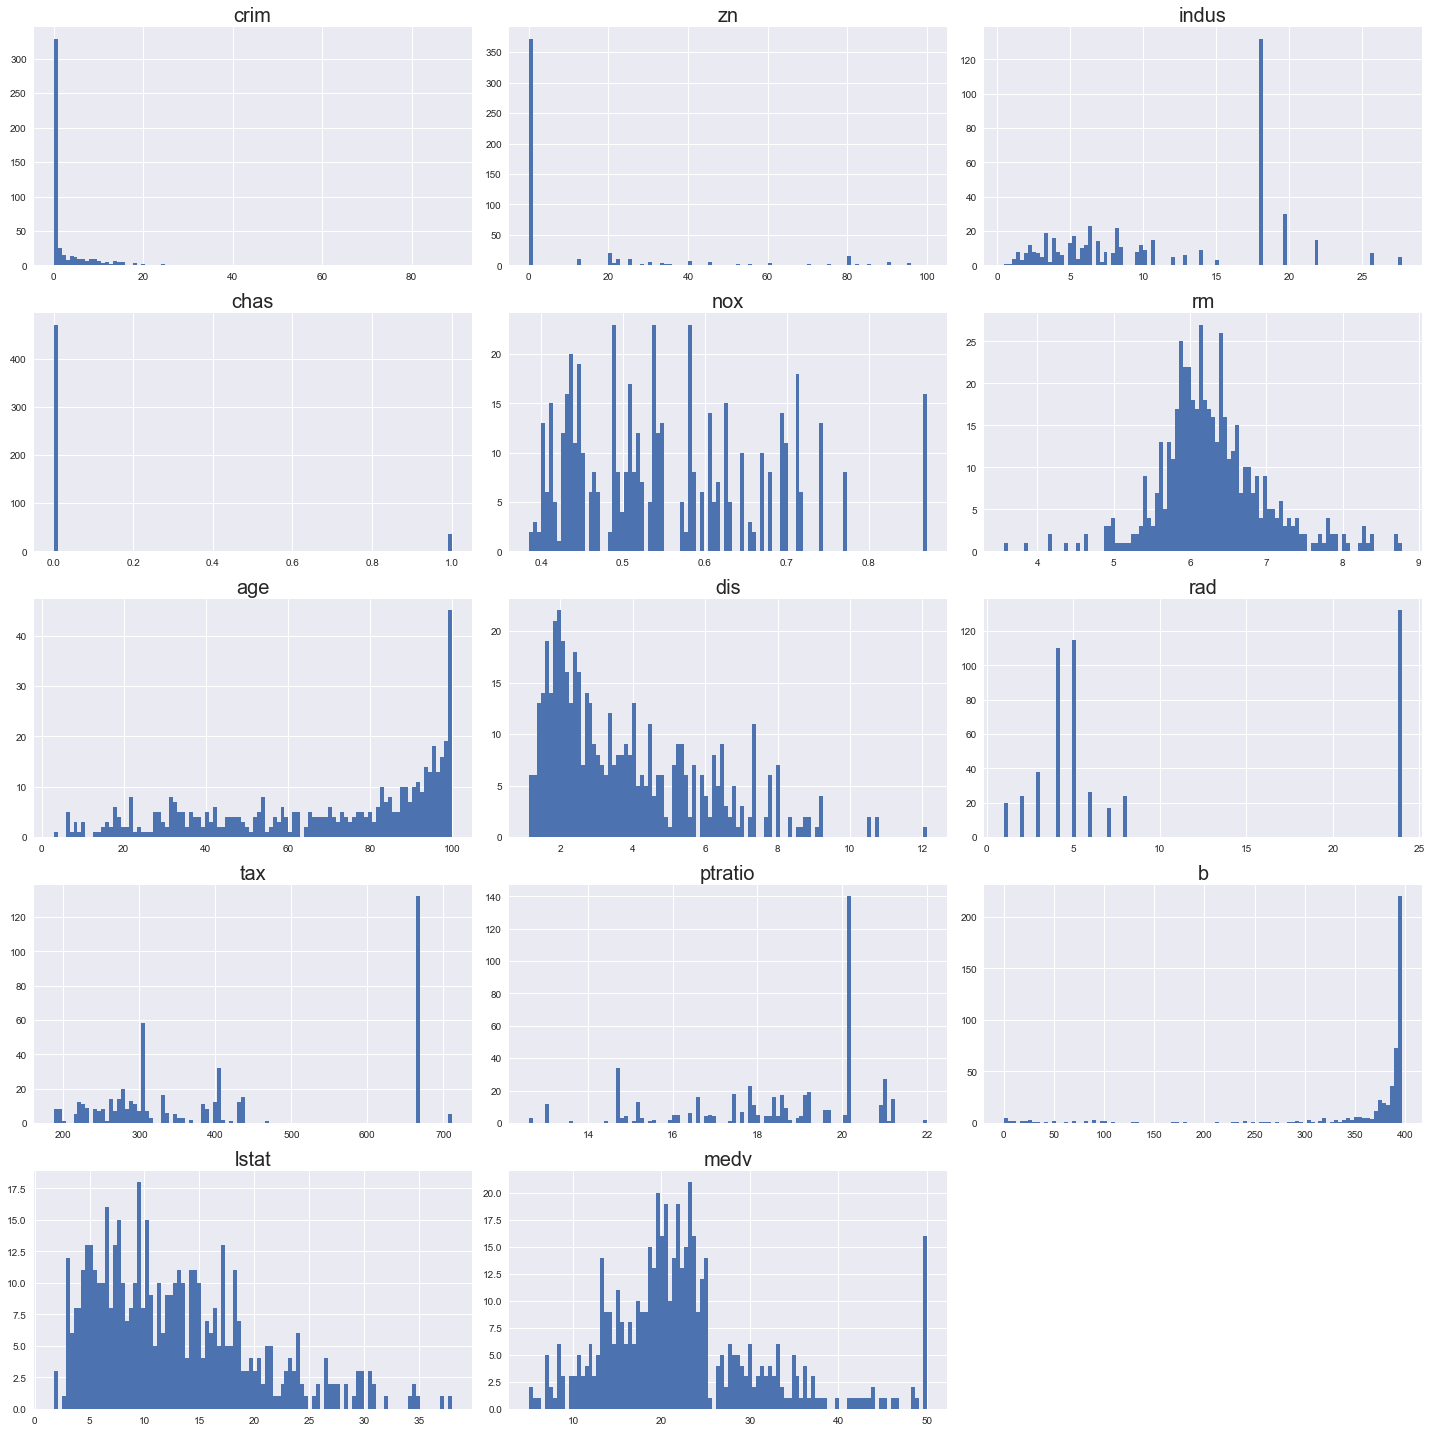

In [110]:
# Your code here 

plt.style.use('seaborn')

variables = df.columns.values

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=100,ax=ax)
        ax.set_title(var_name, fontsize=20)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df, variables, 5, 3)

In [116]:
# You observations here 

# The following variables appear normally distributed:
# rm, dis, medv

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [36]:
# Your code here

df2 = df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df2.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

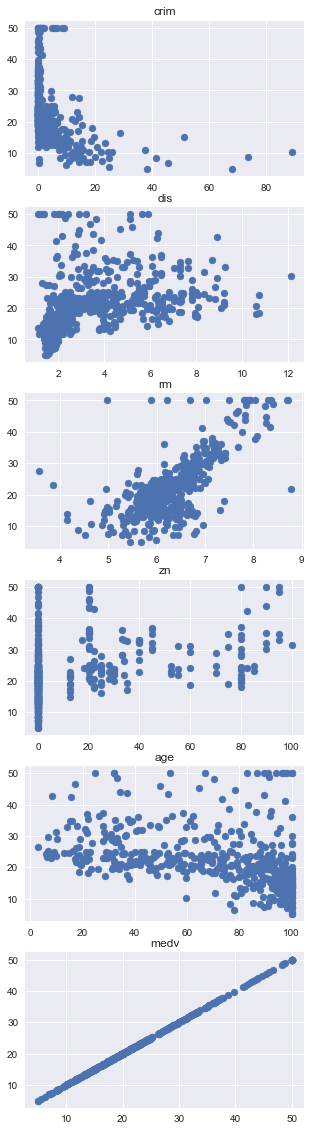

In [37]:
# Your code here 

variables2 = df2.columns.values

def draw_scatter(df2, variables2, n_rows, n_cols):
    fig = plt.figure(figsize=(5,20))
    for idx, var in enumerate(variables2):
        ax = fig.add_subplot(n_rows, n_cols, idx+1)
        plt.scatter(df2[var], df2['medv'])
        ax.set_title(var)
    plt.show()

draw_scatter(df2, variables2, 6, 1)



In [11]:
# Your observations here

# Linearity appears to be a reasonable assumption for rm only.


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

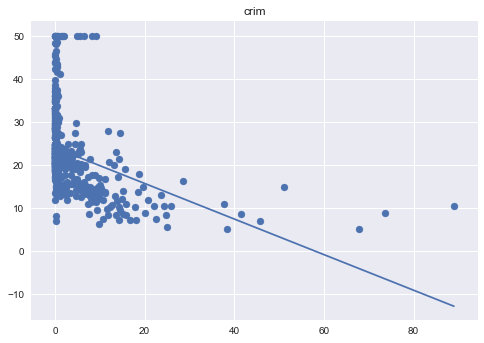

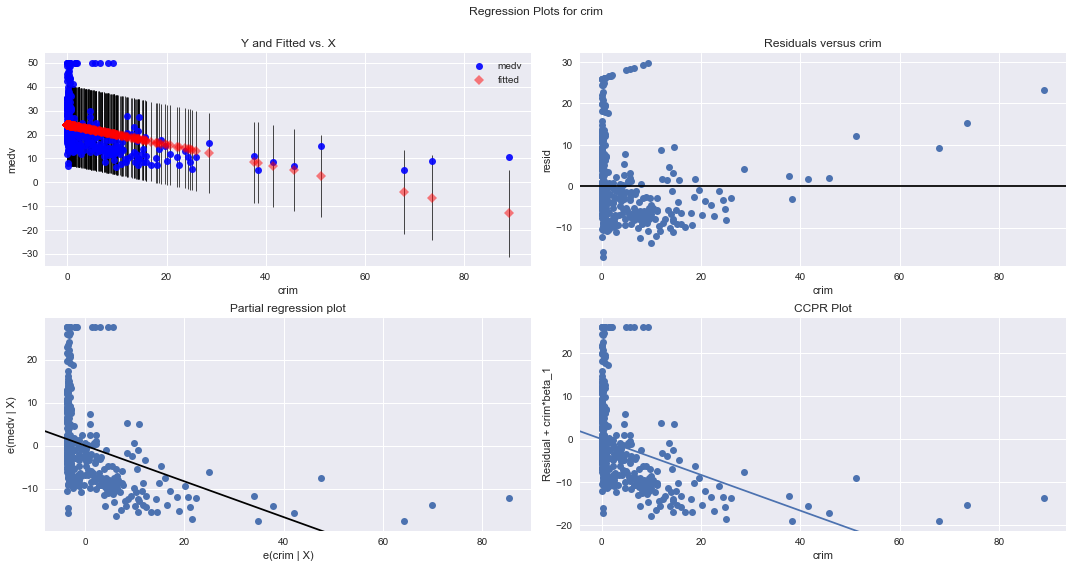

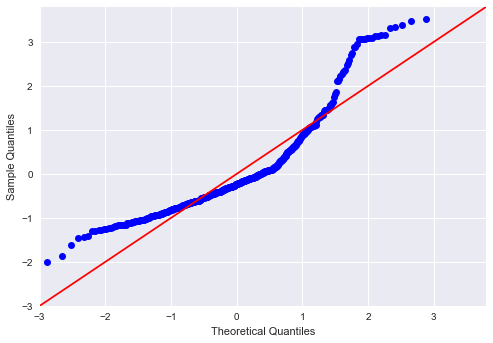

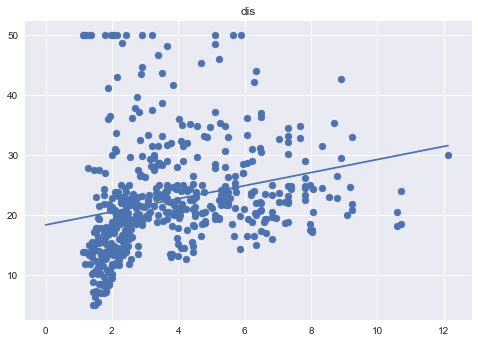

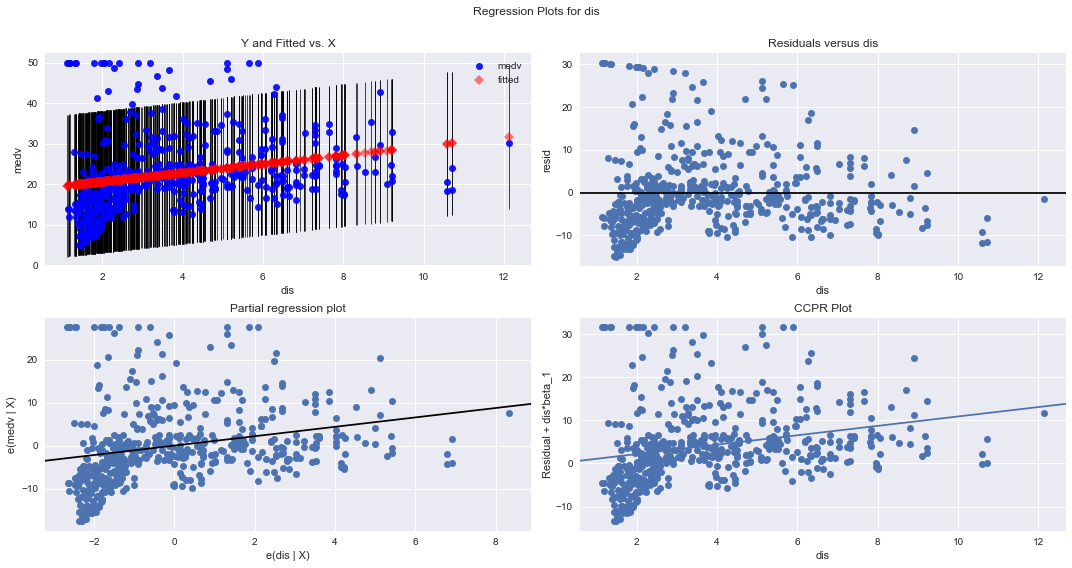

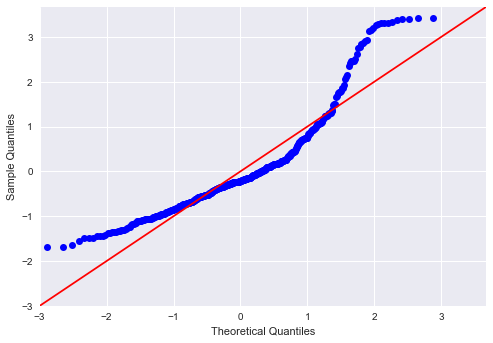

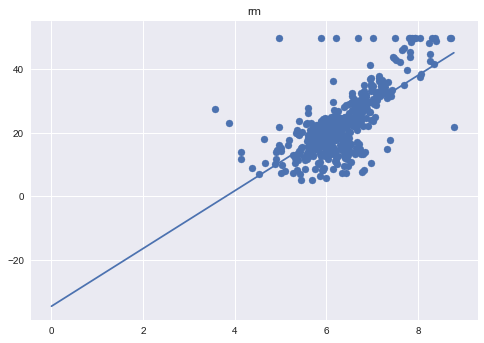

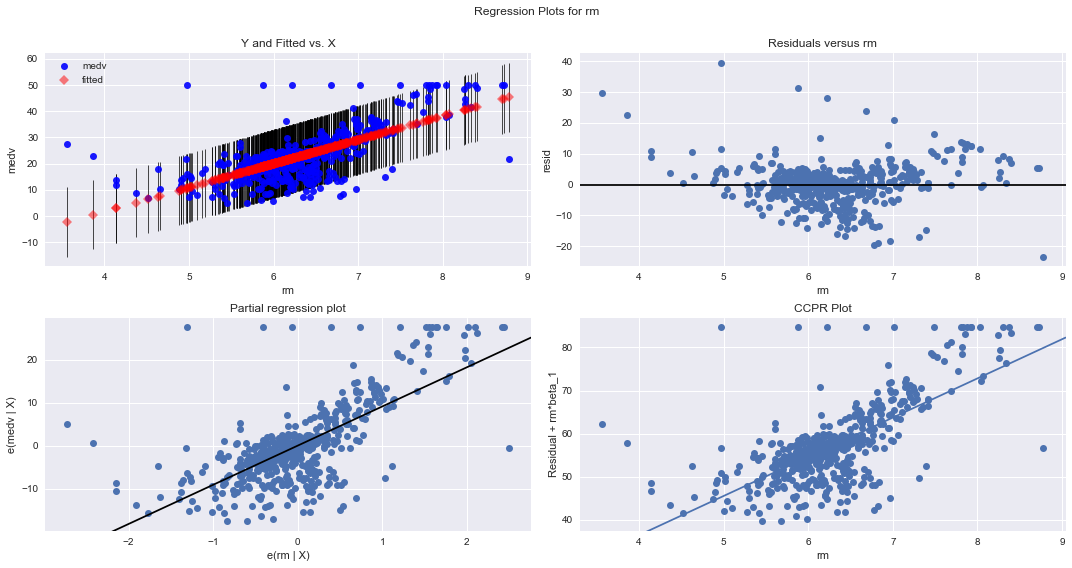

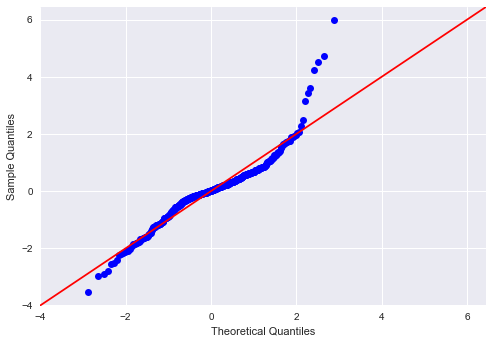

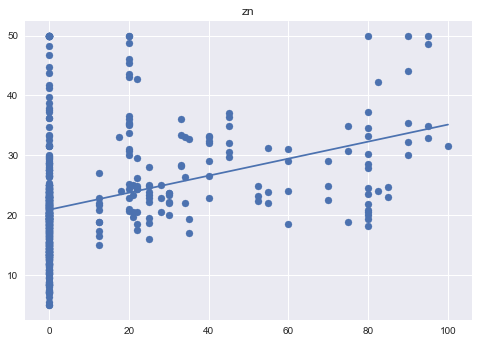

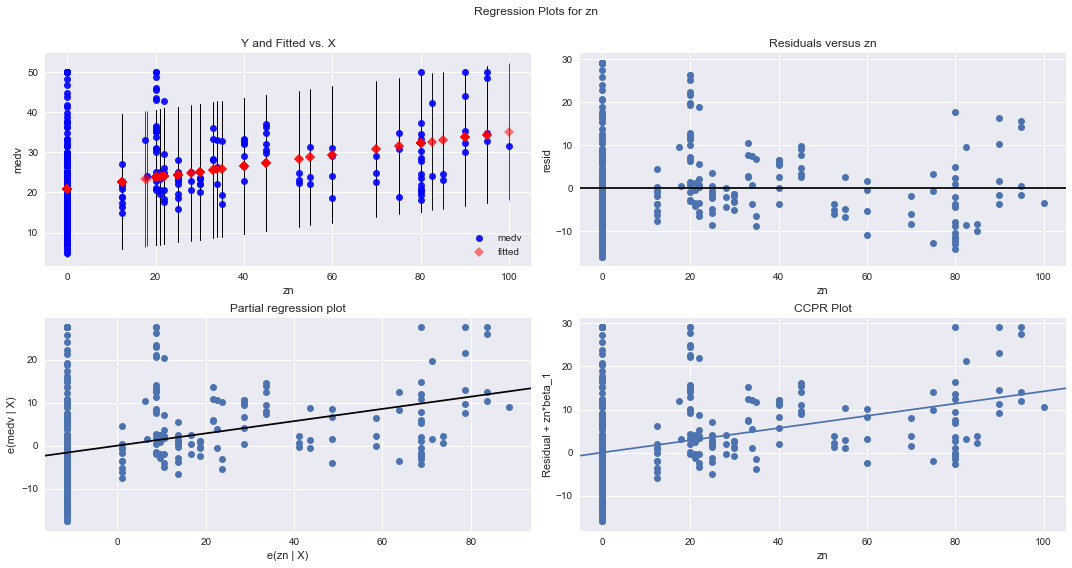

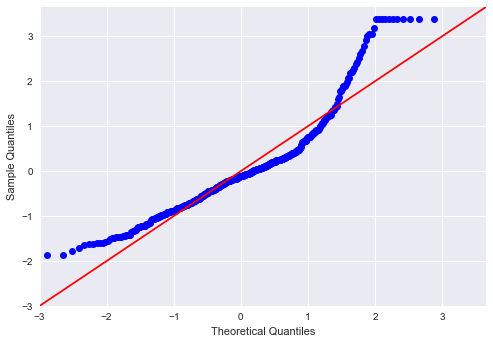

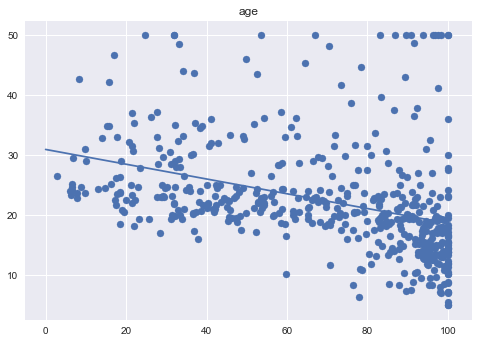

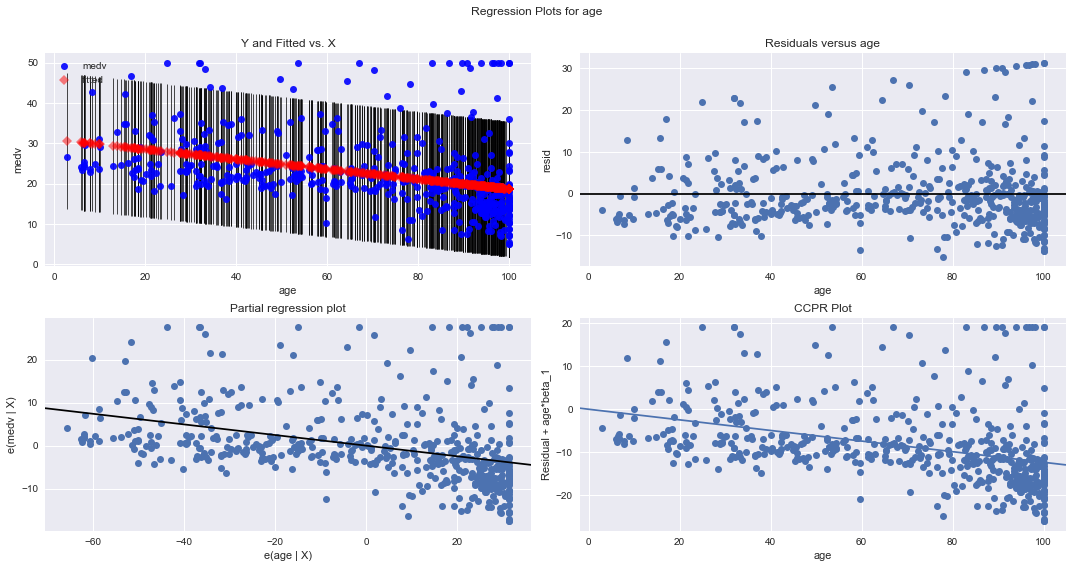

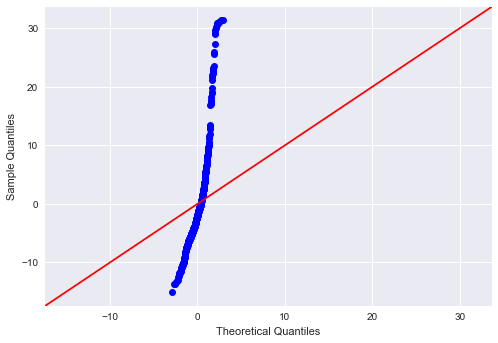

In [116]:
import statsmodels.stats.api as sms

independent_variables = ['crim', 'dis', 'rm', 'zn', 'age']

list_stats = []

for independent in independent_variables:
    Y = df2['medv']
    X = sm.add_constant(df2[independent])
    model = sm.OLS(Y,X)
    results = model.fit()
    x_pred = np.linspace(0,np.max(df2[independent]), 500)
    y_pred = x_pred*results.params[1] + results.params[0]
    plt.plot(x_pred, y_pred)
    plt.scatter(df2[independent], df2['medv'])
    plt.title(independent)
    fig = plt.figure(figsize=(15,8))
    sm.graphics.plot_regress_exog(results, independent, fig=fig)
    residual = results.resid
    sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True)
    data_dict = {'Independent Variable': independent, 'R_Squared' : results.rsquared, 'Intercept': results.params[0], 'Slope' : results.params[1], 'P-Value': results.f_pvalue, 'Normality (JB)': sms.jarque_bera(residual)}
    list_stats.append(data_dict)
    plt.show()
  
    






    



In [107]:
pd.DataFrame(list_stats)

,Independent Variable,Intercept,Normality (JB),P-Value,R_Squared,Slope
0,crim,24.033106,"(30765.76712515711, 0.0)",1.173987e-19,0.150780,-0.415190
1,dis,18.390088,"(90.50359562358396, 0.0)",1.206612e-08,0.062464,1.091613
2,rm,-34.670621,"(86.67720234346675, 0.0)",2.487229e-74,0.483525,9.102109
3,zn,20.917579,"(749.237481620814, 0.0)",5.713584e-17,0.129921,0.142140
4,age,30.978678,"(49.91372814807717, 1.4500067813116857e-11)",1.569982e-18,0.142095,-0.123163


In [118]:
#Your observations here 

# The graphs show that age has be least resemblance to a normal distribution. The other independent variables have a better fit, but it is not ideal.
# There is evidence of heteroscedasticity


Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.